In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('font', family='AppleGothic')

In [2]:
import tabula

In [3]:
df1 = tabula.read_pdf('2012년_출판시장통계.pdf', pages=13, multiple_tables=True)[0]

In [4]:
df1.rename(columns={'Unnamed: 0':'영업이익순위'})

,영업이익순위,Unnamed: 1,Unnamed: 2,Unnamed: 3,2011년,Unnamed: 4,Unnamed: 5,2012년,매출액,영업이익
0,영업이,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,기업명,분류,NaN,NaN,영업이,NaN,NaN,영업이 증감률,증감률
2,익순위,NaN,NaN,매출액,영업이익,NaN,매출액,영업이익,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,익률%,NaN,NaN,익률% %,%
4,1,교원구몬,1,"673,103","74,512",11.1,"653,055","77,640",11.9 -3.0,4.2
5,2,대교,1,"793,665","65,436",8.2,"771,528","40,273",5.2 -2.8,-38.5
6,3,웅진씽크빅(학습지),1,"394,630","33,683",8.5,"391,022","19,558",5.0 -0.9,-41.9
7,4,재능교육,1,"251,908","1,770",0.7,"242,530","8,321",3.4 -3.3,370.1
8,5,한솔교육,1,"246,638","-1,124",-0.5,"228,116","4,477",2.0 -7.5,흑자전환
9,6,장원교육,1,"43,895","2,795",6.4,"44,242","3,364",7.6 0.8,20.4


In [5]:
col_names = df1.columns.tolist()
col_names

['Unnamed: 0',
 'Unnamed: 1',
 'Unnamed: 2',
 'Unnamed: 3',
 '2011년',
 'Unnamed: 4',
 'Unnamed: 5',
 '2012년',
 '매출액',
 '영업이익']

In [6]:
new_col_name = ['순위','기업명','분류','매출액_2011','영업이익_2011','영업이익률_2011','매출액_2012',
                '영업이익_2012','영업이익율','영업이익증감율']
new_col_name

['순위',
 '기업명',
 '분류',
 '매출액_2011',
 '영업이익_2011',
 '영업이익률_2011',
 '매출액_2012',
 '영업이익_2012',
 '영업이익율',
 '영업이익증감율']

In [7]:
trans_name = dict(zip(col_names, new_col_name))

In [8]:
df2 = df1.rename(columns=trans_name).iloc[4:].dropna()

In [9]:
def func1(row):
    return int(row.replace(',',''))

df2['매출액_2011'].apply(func1)

4     673103
5     793665
6     394630
7     251908
8     246638
9      43895
10      9649
11     18413
13    482314
14    217371
15     53787
16     23455
17     10089
18     56384
19     25799
20     55314
21     11394
22     41651
23     48033
25    111835
26    236886
27    120324
28     25015
Name: 매출액_2011, dtype: int64

In [24]:
df3 = pd.melt(df2, id_vars=['순위','기업명','분류','영업이익율','영업이익증감율'])
df3

,순위,기업명,분류,영업이익율,영업이익증감율,variable,value
0,1,교원구몬,1,11.9 -3.0,4.2,매출액_2011,"673,103"
1,2,대교,1,5.2 -2.8,-38.5,매출액_2011,"793,665"
2,3,웅진씽크빅(학습지),1,5.0 -0.9,-41.9,매출액_2011,"394,630"
3,4,재능교육,1,3.4 -3.3,370.1,매출액_2011,"251,908"
4,5,한솔교육,1,2.0 -7.5,흑자전환,매출액_2011,"246,638"
...,...,...,...,...,...,...,...
110,11,프뢰벨하우스,2,-7.7 -11.9,적자전환,영업이익_2012,"-3,245"
111,1,비상교육,3,18.5 6.8,33.0,영업이익_2012,"22,038"
112,2,천재교육,3,7.0 -5.0,3.2,영업이익_2012,"15,776"
113,3,미래엔,3,9.5 9.8,33.1,영업이익_2012,"12,487"


In [11]:
def func2(row):
    return row.split('_')[1]

df3['연도'] = df3['variable'].apply(func2)

In [12]:
def func3(row):
    return row.split('_')[0]

df3['구분'] = df3['variable'].apply(func3)

In [13]:
cond1 = (df3['구분'] == '매출액')
df3_1 = df3.loc[cond1].rename(columns={'value':'매출액'})

In [14]:
cond1 = (df3['구분'] == '영업이익')
df3_2 = df3.loc[cond1].rename(columns={'value':'영업이익'})

In [15]:
df3_1['id'] = df3_1['기업명'] + df3_1['연도']

In [16]:
df3_2['id'] = df3_2['기업명'] + df3_2['연도']

In [25]:
df3_2

,순위,기업명,분류,영업이익율,영업이익증감율,variable,영업이익,연도,구분,id
23,1,교원구몬,1,11.9 -3.0,4.2,영업이익_2011,"74,512",2011,영업이익,교원구몬2011
24,2,대교,1,5.2 -2.8,-38.5,영업이익_2011,"65,436",2011,영업이익,대교2011
25,3,웅진씽크빅(학습지),1,5.0 -0.9,-41.9,영업이익_2011,"33,683",2011,영업이익,웅진씽크빅(학습지)2011
26,4,재능교육,1,3.4 -3.3,370.1,영업이익_2011,"1,770",2011,영업이익,재능교육2011
27,5,한솔교육,1,2.0 -7.5,흑자전환,영업이익_2011,"-1,124",2011,영업이익,한솔교육2011
28,6,장원교육,1,7.6 0.8,20.4,영업이익_2011,"2,795",2011,영업이익,장원교육2011
29,7,노벨과개미,1,31.4 5.2,79.7,영업이익_2011,"1,775",2011,영업이익,노벨과개미2011
30,8,노벨아이(교수닷컴),1,8.0 -2.2,30.9,영업이익_2011,"1,096",2011,영업이익,노벨아이(교수닷컴)2011
31,1,교원,2,10.4 1.1,13.7,영업이익_2011,"44,637",2011,영업이익,교원2011
32,2,웅진씽크빅(전집),2,9.4 -5.4,-32.1,영업이익_2011,"19,623",2011,영업이익,웅진씽크빅(전집)2011


In [17]:
df4 = pd.merge(df3_1, df3_2, on='id', suffixes=('','_drop'))

In [23]:
df5 = df4[['순위','기업명','분류','연도','매출액','영업이익']]
df5

,순위,기업명,분류,연도,매출액,영업이익
0,1,교원구몬,1,2011,"673,103","74,512"
1,2,대교,1,2011,"793,665","65,436"
2,3,웅진씽크빅(학습지),1,2011,"394,630","33,683"
3,4,재능교육,1,2011,"251,908","1,770"
4,5,한솔교육,1,2011,"246,638","-1,124"
5,6,장원교육,1,2011,"43,895","2,795"
6,7,노벨과개미,1,2011,"9,649","1,775"
7,8,노벨아이(교수닷컴),1,2011,"18,413","1,096"
8,1,교원,2,2011,"482,314","44,637"
9,2,웅진씽크빅(전집),2,2011,"217,371","19,623"


In [19]:
df5['매출액(int)'] = df5['매출액'].apply(func1)
df5['영업이익(int)'] = df5['영업이익'].apply(func1)

/var/folders/jk/39vchm610gncrh7q8gt2gmk00000gn/T/ipykernel_13981/2531553757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['매출액(int)'] = df5['매출액'].apply(func1)
/var/folders/jk/39vchm610gncrh7q8gt2gmk00000gn/T/ipykernel_13981/2531553757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['영업이익(int)'] = df5['영업이익'].apply(func1)


In [20]:
df5

,순위,기업명,분류,연도,매출액,영업이익,매출액(int),영업이익(int)
0,1,교원구몬,1,2011,"673,103","74,512",673103,74512
1,2,대교,1,2011,"793,665","65,436",793665,65436
2,3,웅진씽크빅(학습지),1,2011,"394,630","33,683",394630,33683
3,4,재능교육,1,2011,"251,908","1,770",251908,1770
4,5,한솔교육,1,2011,"246,638","-1,124",246638,-1124
5,6,장원교육,1,2011,"43,895","2,795",43895,2795
6,7,노벨과개미,1,2011,"9,649","1,775",9649,1775
7,8,노벨아이(교수닷컴),1,2011,"18,413","1,096",18413,1096
8,1,교원,2,2011,"482,314","44,637",482314,44637
9,2,웅진씽크빅(전집),2,2011,"217,371","19,623",217371,19623


In [21]:
df5.describe()

,매출액(int),영업이익(int)
count,46.000000,46.000000
mean,169750.804348,13740.739130
std,215084.645601,19868.073262
min,9649.000000,-3245.000000
25%,25016.250000,1457.500000
50%,54550.500000,5506.500000
75%,234693.500000,15653.500000
max,793665.000000,77640.000000


<AxesSubplot:xlabel='매출액(int)', ylabel='기업명'>

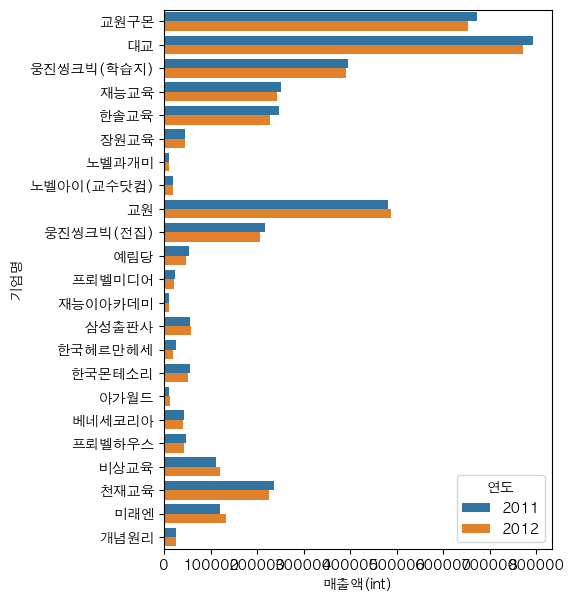

In [22]:
plt.figure(figsize=[5,7])
sns.barplot(data=df5, y='기업명', x='매출액(int)', hue='연도')